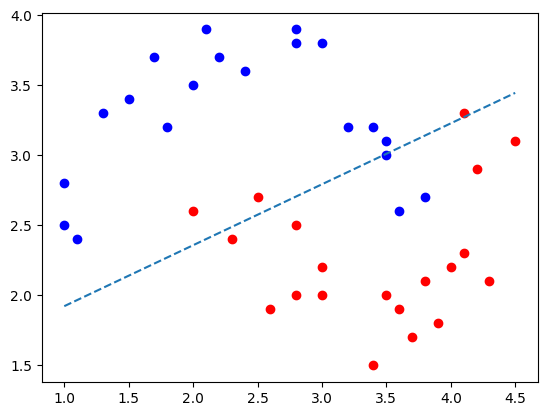

In [3]:
from cProfile import label

# 課題1
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data1 = [
 [4.2, 2.9], [2.5, 2.7], [4.1, 3.3], [3.0, 2.2], [2.8, 2.5],
 [4.3, 2.1], [4.5, 3.1], [2.6, 1.9], [3.9, 1.8], [2.8, 2.0],
 [3.7, 1.7], [3.5, 2.0], [3.6, 1.9], [2.3, 2.4], [2.0, 2.6],
 [4.0, 2.2], [3.4, 1.5], [4.1, 2.3], [3.0, 2.0], [3.8, 2.1]
]

target1 = [
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]

data2 = [
 [2.0, 3.5], [2.8, 3.8], [3.2, 3.2], [3.5, 3.1], [2.4, 3.6],
 [1.0, 2.5], [2.1, 3.9], [1.1, 2.4], [1.5, 3.4], [1.7, 3.7],
 [3.4, 3.2], [3.8, 2.7], [1.3, 3.3], [1.0, 2.8], [3.0, 3.8],
 [3.6, 2.6], [2.8, 3.9], [3.5, 3.0], [1.8, 3.2], [2.2, 3.7]
]

target2 = [
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]

data1 = np.array(data1)
data2 = np.array(data2)
target1 = np.array(target1)
target2 = np.array(target2)

data = np.vstack((data1, data2))
target = np.hstack((target1, target2))

plt.scatter(data1[:, 0], data1[:, 1], color='r', label='data1')
plt.scatter(data2[:, 0], data2[:, 1], color='b', label='data2')

log = LogisticRegression()
log.fit(data, target)

coef = log.coef_[0]
intercept = log.intercept_[0]

x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = (-intercept - coef[0] * x) / coef[1]
plt.plot(x, y, linestyle='--')
plt.show()


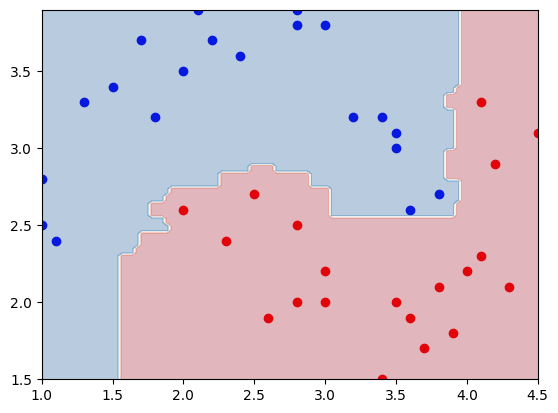

In [5]:
# 課題2
from sklearn.ensemble import RandomForestClassifier

plt.scatter(data1[:, 0], data1[:, 1], color='r', label='data1')
plt.scatter(data2[:, 0], data2[:, 1], color='b', label='data2')

clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(data, target)

x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
xx, yy = np.meshgrid(x, y)
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.3)
plt.show()

             real 0  real 1
predicted 0     179      30
predicted 1      38      61


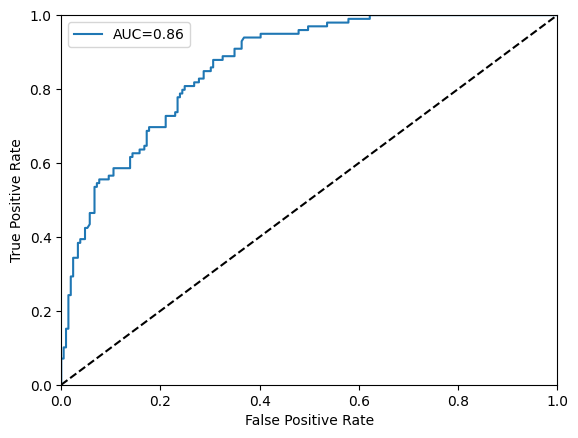

[0.08514532 0.25912032 0.09259555 0.06998456 0.06910864 0.15610234
 0.13933296 0.12861032]


In [26]:
# 課題3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

df = pd.read_csv("pima-indians-diabetes.txt", sep='\t', index_col=0)

X = df.iloc[:, :8]

X = X.apply(lambda x: (x-x.min()) / (x.max() - x.min()), axis=0)
Y = df.iloc[:, 8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# ランダムフォレストによる分類
clf = RandomForestClassifier(n_estimators=10000, random_state=42)
clf.fit(X_train, Y_train)

# 混同行列の出力
Y_pred = clf.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])
print(conf_matrix)

# ROC曲線
Y_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC=%0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 寄与度の出力
print(clf.feature_importances_)


In [27]:
# 課題4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

df = pd.read_csv("iris.txt", sep='\t', index_col=0)

X = df.iloc[:, :4]

X = X.apply(lambda x: (x-x.min()) / (x.max() - x.min()), axis=0)
Y = df.iloc[:, 4]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# ランダムフォレストによる分類
clf = RandomForestClassifier(n_estimators=10000, random_state=42)
clf.fit(X_train, Y_train)

# 混同行列の出力
Y_pred = clf.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=['predicted 0', 'predicted 1', 'predicted 2'], columns=['real 0', 'real 1', 'real 2'])
print(conf_matrix)

# 寄与度の出力
print(clf.feature_importances_)

             real 0  real 1  real 2
predicted 0      17       0       0
predicted 1       0      19       1
predicted 2       0       5      18
[0.09580159 0.02050932 0.39094425 0.49274484]


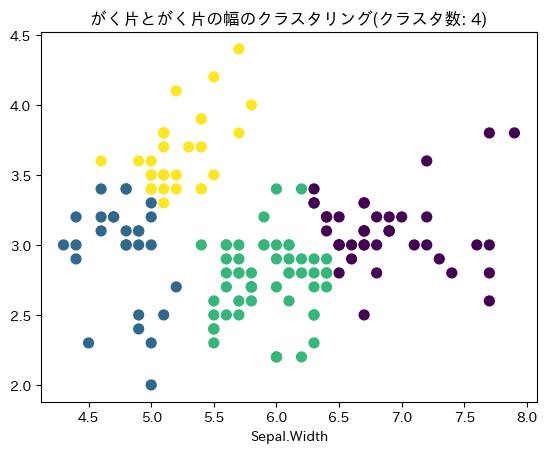

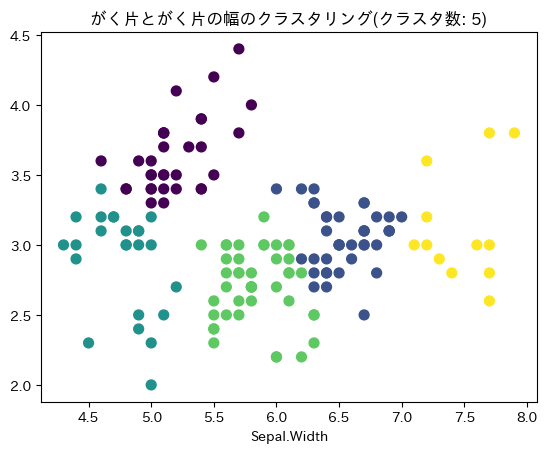

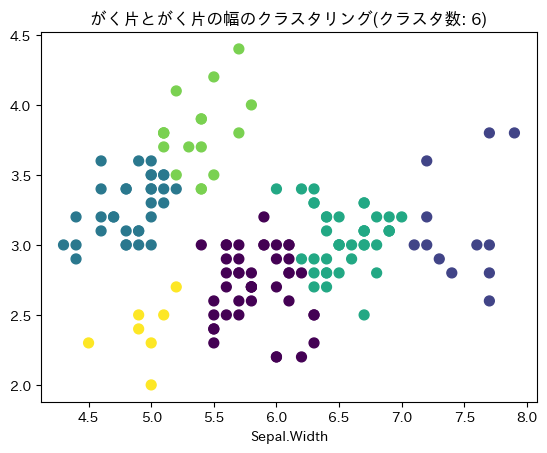

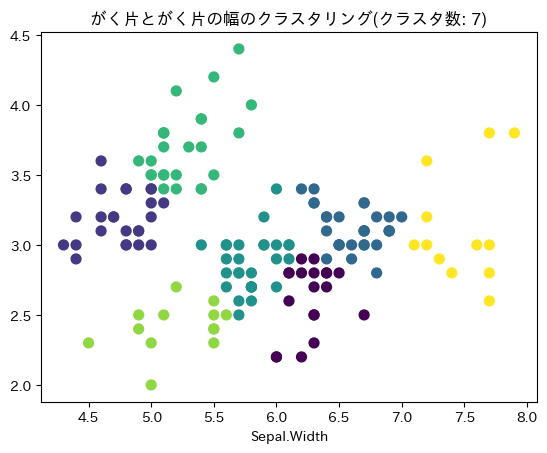

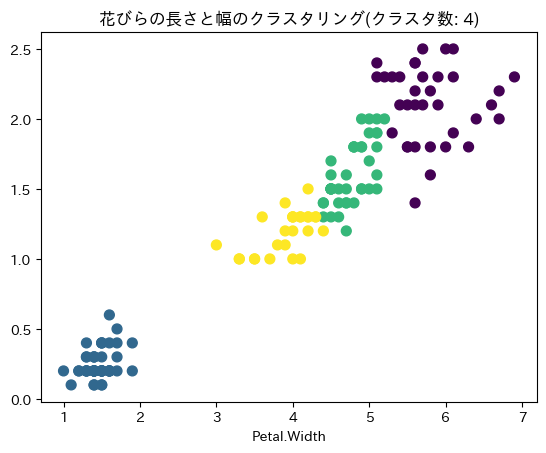

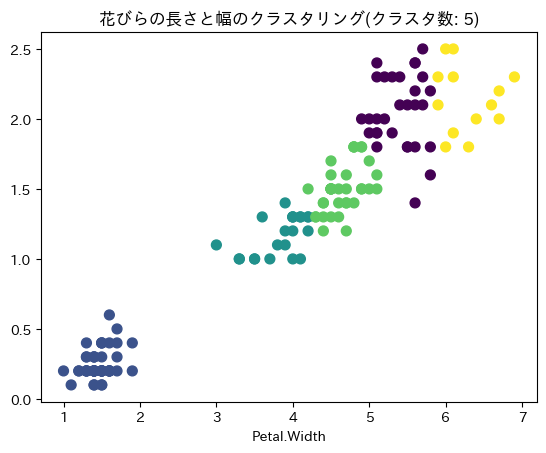

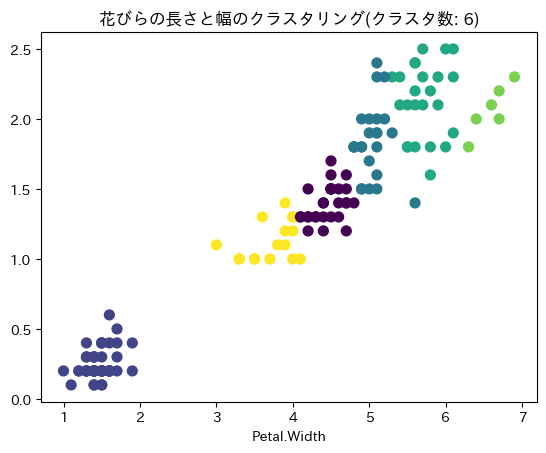

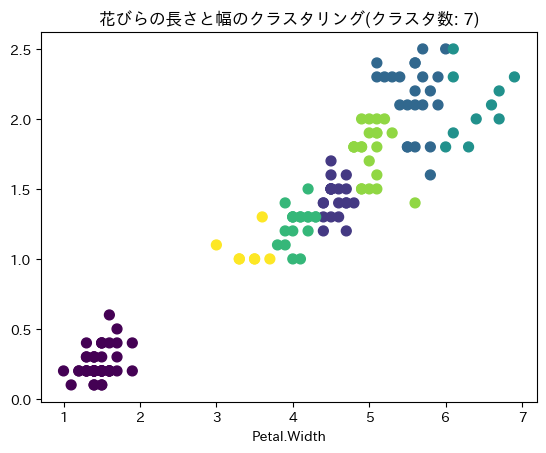

In [37]:
# 課題5
from sklearn.cluster import KMeans
import japanize_matplotlib
df2 = pd.read_csv("iris.txt", sep='\t', index_col=0)

# ①
for i in range(4, 8):
    kmeans_model = KMeans(n_clusters=i, n_init=10).fit(df2.iloc[:, :2])
    plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=kmeans_model.labels_, s=50)
    plt.xlabel(df2.columns[0])
    plt.xlabel(df2.columns[1])
    plt.title(f'がく片とがく片の幅のクラスタリング(クラスタ数: {i})')
    plt.show()

# ②
for i in range(4, 8):
    kmeans_model = KMeans(n_clusters=i, n_init=10).fit(df2.iloc[:, 2:4])
    plt.scatter(df2.iloc[:, 2], df2.iloc[:, 3], c=kmeans_model.labels_, s=50)
    plt.xlabel(df2.columns[2])
    plt.xlabel(df2.columns[3])
    plt.title(f'花びらの長さと幅のクラスタリング(クラスタ数: {i})')
    plt.show()
